In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
em = pd.read_csv("EM_N110.csv")

In [116]:
em

,Temp,E_mean,E_std,M_mean,M_std
0,1.60,-1.923747,0.007882,-0.978311,0.002535
1,1.61,-1.918356,0.008394,-0.976697,0.002748
2,1.62,-1.855246,0.008251,-0.482514,0.035508
3,1.63,-1.912025,0.007599,0.974563,0.002446
4,1.64,-1.911061,0.007798,0.974362,0.002651
...,...,...,...,...,...
195,3.55,-0.580167,0.015468,-0.001973,0.021624
196,3.56,-0.575214,0.015432,0.003194,0.018749
197,3.57,-0.573840,0.014413,0.003264,0.018138
198,3.58,-0.570260,0.016060,-0.001921,0.019169


## Heat Capacity

$$
c_v = \frac{k}{T^2} Var{E}
$$

set $\beta=1$
$$
c_v = \frac{1}{T} Var{E}
$$

In [117]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

Text(0.5, 1.0, 'Heat Capacity Plots')

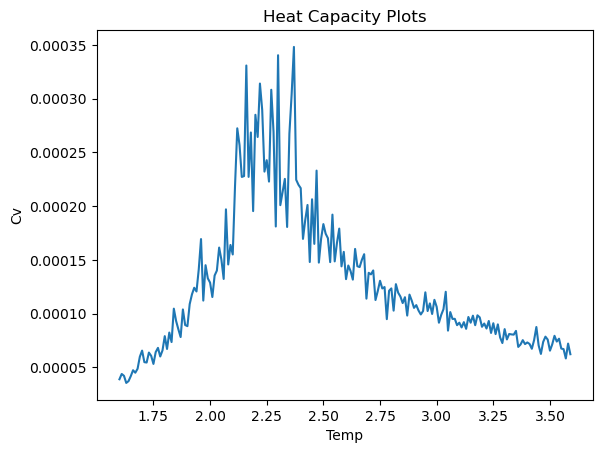

In [120]:
plt.plot(em["Temp"], get_cv(em))
plt.xlabel("Temp")
plt.ylabel("Cv")
plt.title("Heat Capacity Plots")

In [121]:
def exponential_growth(x, k, A):
    return A*np.exp(x / k)

# Finding Tc

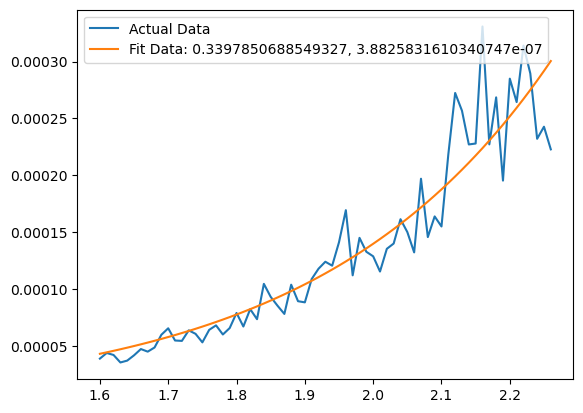

In [122]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit



popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


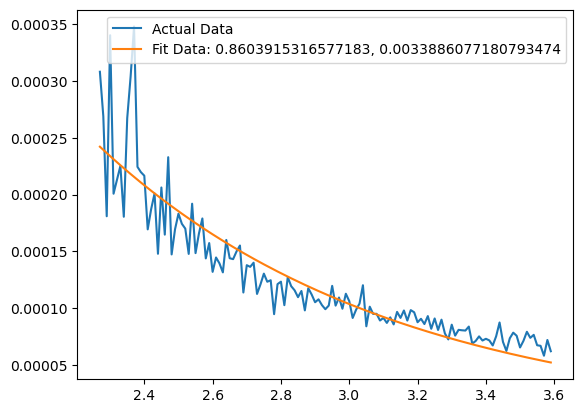

In [123]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))

plt.plot(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data")
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()


In [124]:
index

67

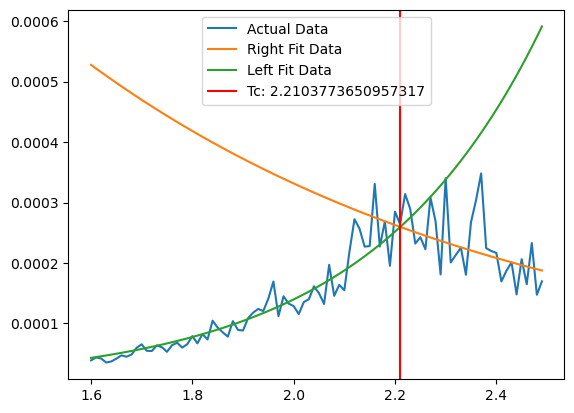

In [125]:
plt.plot(em["Temp"][:90], get_cv(em[:90]), label= "Actual Data")
plt.plot(em["Temp"][:90], exponential_decay(em["Temp"][:90], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][:90], exponential_growth(em["Temp"][:90], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


# Magnetization

Text(0, 0.5, 'Aveage Site Magnetization')

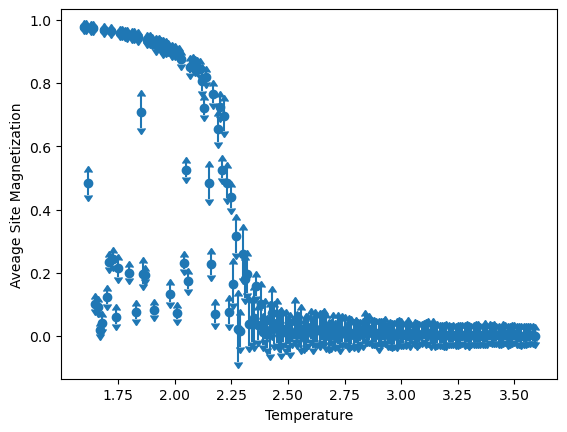

In [150]:
#plt.plot(em["Temp"], em["M_mean"])
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"], uplims=True, lolims=True,fmt='o')
plt.xlabel('Temperature')
plt.ylabel('Aveage Site Magnetization')

In [162]:
def sigmoid(x, a, b, c):
    return  a - a / (1 + np.exp(-b * (x - c)))

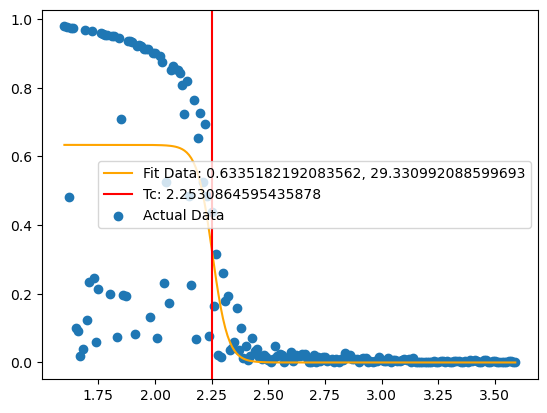

In [171]:
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1))

plt.scatter(em["Temp"], np.absolute(em["M_mean"]), label= "Actual Data")
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit Data: {}, {}".format(*popt_l), color= "orange")
plt.axvline(popt_l[2], label = "Tc: {}".format(popt_l[2]), color = "r")
plt.legend()


## Magnetic Susceptibility

$\chi = \beta Var(M)$

set $\beta = 1$

$\chi = Var(M)$

In [126]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

Text(0.5, 1.0, 'Magnetic Susceptibility Plots')

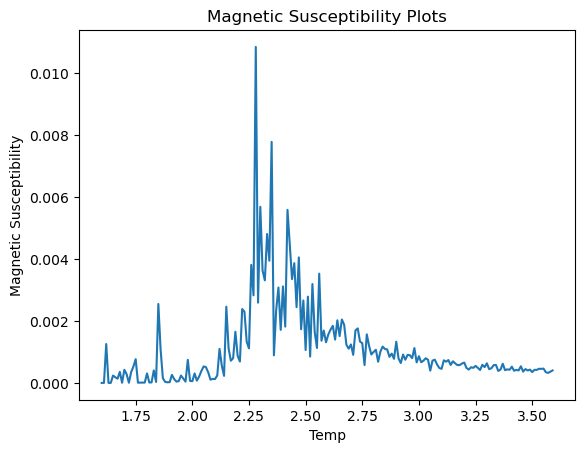

In [127]:
plt.plot(em["Temp"], get_ms(em))
plt.xlabel("Temp")
plt.ylabel("Magnetic Susceptibility")
plt.title("Magnetic Susceptibility Plots")

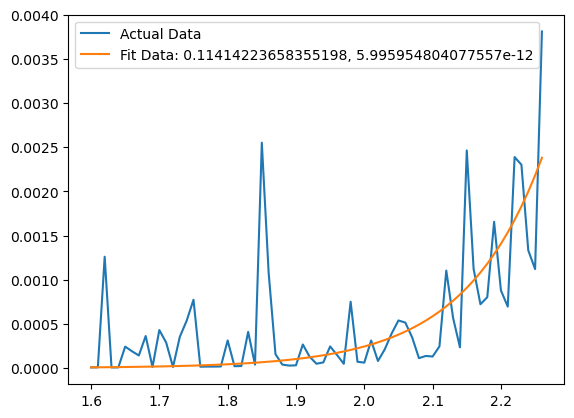

In [128]:
popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_ms(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_ms(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


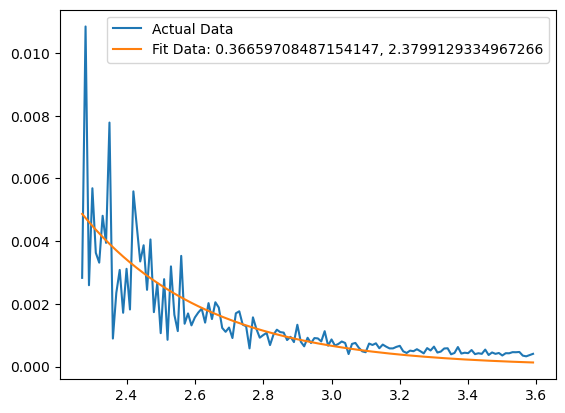

In [129]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1))

plt.plot(em["Temp"][index:], get_ms(em)[index:], label= "Actual Data")
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

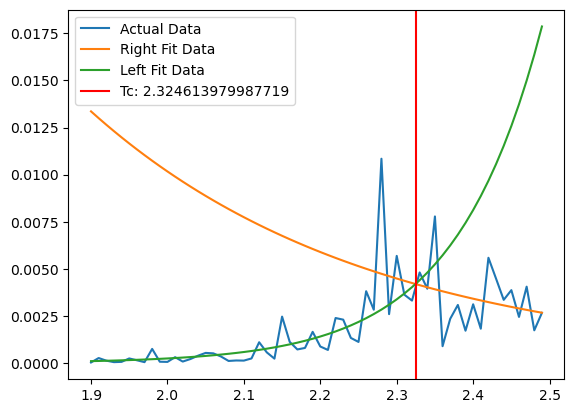

In [130]:
plt.plot(em["Temp"][30:90], get_ms(em[30:90]), label= "Actual Data")
plt.plot(em["Temp"][30:90], exponential_decay(em["Temp"][30:90], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][30:90], exponential_growth(em["Temp"][30:90], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


## Correlation Length

In [131]:
sc = pd.read_csv("SC_N110.csv", index_col = "Temp")
sc = sc.iloc[:, :-1]

In [132]:
sc.shape

(200, 54)

In [133]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=45,d=46,d=47,d=48,d=49,d=50,d=51,d=52,d=53,d=54
Temp,,,,,,,,,,,,,,,,,,,,,
1.60,0.000034,2.546482e-06,-0.000005,-0.000007,-0.000005,-3.895254e-07,-4.451610e-07,-0.000003,-0.000008,-3.477354e-06,...,-3.627024e-07,-4.924193e-06,-0.000005,-3.395222e-06,-0.000005,-3.478022e-06,-0.000003,-0.000007,-0.000006,-0.000005
1.61,0.000048,4.116275e-06,-0.000003,-0.000008,-0.000005,-7.974181e-06,-3.493585e-06,-0.000005,-0.000007,-6.484456e-06,...,-6.539843e-06,-3.506912e-06,-0.000008,-4.913085e-06,-0.000005,-6.622668e-06,-0.000002,-0.000010,-0.000009,-0.000005
1.62,0.003797,3.536452e-03,0.003330,0.003145,0.002955,2.767948e-03,2.598982e-03,0.002411,0.002235,2.062114e-03,...,-1.527310e-03,-1.528261e-03,-0.001519,-1.520343e-03,-0.001522,-1.510331e-03,-0.001520,-0.001527,-0.001524,-0.001508
1.63,0.000069,5.299461e-06,-0.000002,-0.000004,-0.000010,-1.419176e-05,-6.362537e-06,-0.000007,-0.000002,-4.768800e-07,...,-8.279890e-06,-8.348800e-06,-0.000002,-8.182339e-06,-0.000011,-9.699512e-06,-0.000007,-0.000008,-0.000002,-0.000008
1.64,0.000045,7.780870e-07,-0.000007,-0.000005,-0.000008,-5.299971e-06,7.089696e-07,-0.000002,-0.000005,-2.308858e-06,...,-6.789476e-06,-3.742387e-06,-0.000004,7.922660e-07,-0.000002,-7.246933e-07,-0.000004,-0.000004,-0.000007,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.55,0.002546,8.439933e-04,0.000185,0.000051,-0.000154,-1.234956e-04,-1.902220e-05,0.000105,-0.000005,-1.086268e-04,...,-2.613608e-04,-2.185953e-04,-0.000137,-7.803227e-05,-0.000183,-1.945989e-04,-0.000238,-0.000103,-0.000115,-0.000093
3.56,0.002420,6.461267e-04,0.000081,-0.000078,-0.000117,-8.011379e-05,-7.422602e-05,-0.000156,-0.000112,-6.529075e-05,...,-1.241021e-05,-8.276897e-05,-0.000094,-9.029952e-05,-0.000170,-2.840860e-04,-0.000378,-0.000328,-0.000130,-0.000146
3.57,0.002440,7.542082e-04,0.000131,0.000031,-0.000109,-2.025312e-05,-5.217952e-05,-0.000127,-0.000224,-2.982015e-04,...,-1.611268e-04,-1.374024e-04,-0.000136,-1.318124e-04,-0.000101,-9.250599e-05,-0.000045,-0.000018,-0.000105,-0.000113


In [134]:
from scipy.optimize import curve_fit

# Exponential decay function
def exponential_decay(x, k, A):
    return A*np.exp(-x / k)

In [135]:
def cor_len(data):
    T =data.shape[0]
    Ks = []
    for i in range(T):
        popt, pcov = curve_fit(exponential_decay, [i for i in range(data.shape[1])], data.iloc[i], p0=(1.0, 1))
        Ks.append(popt[0])
    return Ks

        

    

/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)


Text(0.5, 1.0, 'Correlation Length Plots')

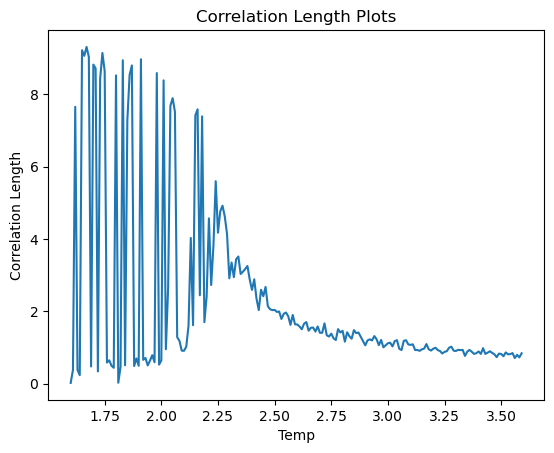

In [136]:
plt.plot(sc.index, cor_len(sc))
plt.xlabel("Temp")
plt.ylabel("Correlation Length")
plt.title("Correlation Length Plots")

/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)
/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)


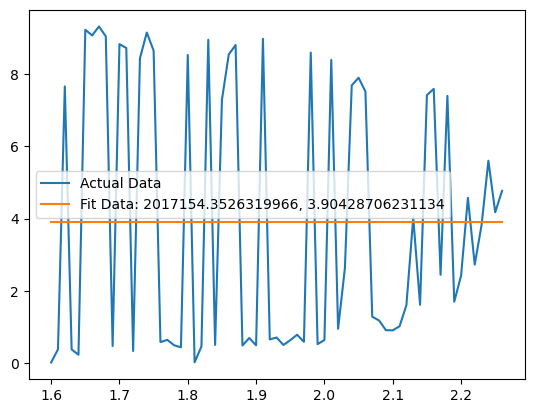

In [142]:
popt_l, pcov_l = curve_fit(exponential_growth, sc.index[0:index], cor_len(sc)[0:index], p0=(1.0, 1))

plt.plot(sc.index[0:index], cor_len(sc)[0:index], label= "Actual Data")
plt.plot(sc.index[0:index], exponential_growth(sc.index[0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)
/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)


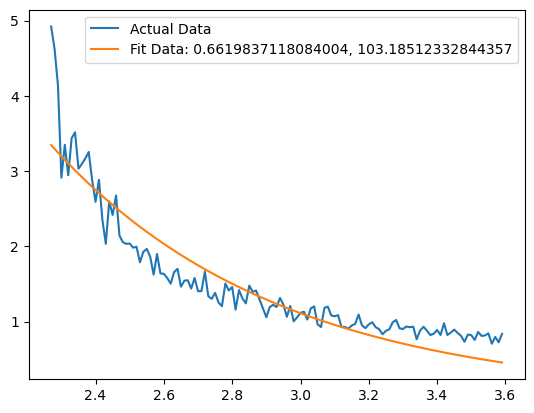

In [143]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, sc.index[index:], cor_len(sc)[index:], p0=(1.0, 1))

plt.plot(sc.index[index:], cor_len(sc)[index:], label= "Actual Data")
plt.plot(sc.index[index:], exponential_decay(sc.index[index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

/Users/varunvaranasi/.local/share/virtualenvs/VIX-Fear_Index-gHVn4sst/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33408/1192645238.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x / k)


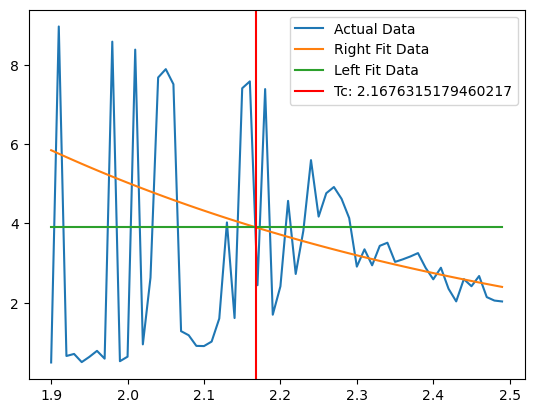

In [146]:
plt.plot(sc.index[30:90], cor_len(sc)[30:90], label= "Actual Data")
plt.plot(sc.index[30:90], exponential_decay(sc.index[30:90], *popt_r), label= "Right Fit Data")
plt.plot(sc.index[30:90], exponential_growth(sc.index[30:90], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()